In [9]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
train_data[0]
train_labels[0]

1

In [10]:
max([max(sequence) for sequence in train_data])
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [12]:
import numpy as np 
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
x_train[0]
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
history_dict=history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5084 - acc: 0.7820 - val_loss: 0.3795 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3004 - acc: 0.9041 - val_loss: 0.3003 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3084 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2838 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2843 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.3165 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0980 - acc: 0.9708 - val_loss: 0.3126 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

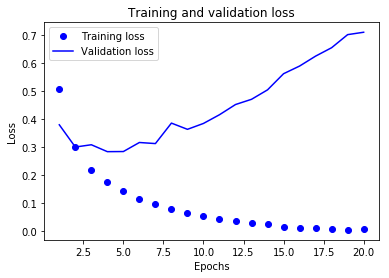

In [17]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

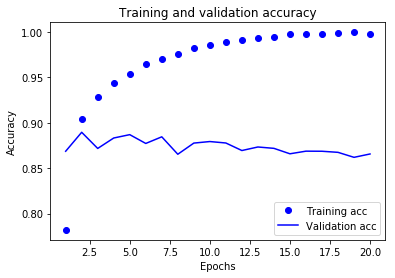

In [18]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Dense(64,activation='tanh',input_shape=(10000,)))
#model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.1334 - acc: 0.8186
Epoch 2/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.0690 - acc: 0.9156
Epoch 3/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.0534 - acc: 0.9326
Epoch 4/4
25000/25000 [==============================] - 3s 127us/step


array([[0.10033603],
       [0.99995947],
       [0.9547507 ],
       ...,
       [0.16685797],
       [0.07143284],
       [0.59053975]], dtype=float32)

In [26]:
results

[0.09063295437574387, 0.87804]